In [17]:
import matplotlib.pyplot as plt

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from   torch.utils.data import DataLoader

In [11]:
transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
    
])
#normalized_pixel=(pixel-mean)/stf_dev

Compose(
    ToTensor()
    Normalize(mean=(0.5,), std=(0.5,))
)

In [12]:
train_dataset=datasets.MNIST(
    root="data",
    train=True,
    transform=transforms.ToTensor(),
    download=True
    
)

test_dataset=datasets.MNIST(
    root="data",
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

In [16]:
train_loader=DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=64,shuffle=False)

data_iter=iter(train_loader)
images,labels=next(data_iter)

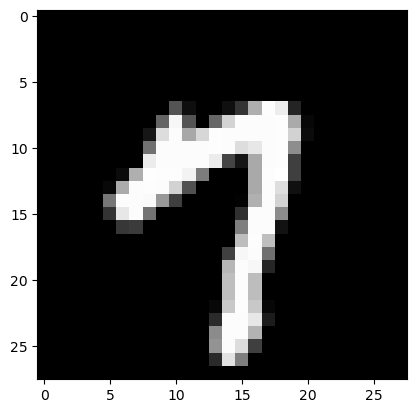

In [18]:
plt.imshow(images[0].squeeze(),cmap="gray")
plt.show()

In [19]:
class DigitsClassifier(nn.Module):
    def __init__ (self):
        super().__init__()
        self.network=nn.Sequential(
            nn.Flatten(),
            nn.Linear(784,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )
    def forward(self,x):
        return self.network(x)

In [21]:
model=DigitsClassifier()
optimizer=optim.Adam(model.parameters(),lr=0.001)
criterion=nn.CrossEntropyLoss() #for classification 


In [22]:
epochs=5

for epoch in range(epochs):
    running_loss=0.0
    for images,labels in train_loader:
        #forward pass
        outputs=model(images)
        loss=criterion(outputs,labels)
        
        running_loss+=loss.item()
        
        #backward pass
        optimizer.zero_grad()
        loss.backward()
        
        #weigh updates
        optimizer.step() #w_new=w_old-n*d(loss)/dw
    print(f"Epoch[{epoch+1}/{epochs}],Loss:{running_loss/len(train_loader):2f}")

Epoch[1/5],Loss:0.340582
Epoch[2/5],Loss:0.136116
Epoch[3/5],Loss:0.095782
Epoch[4/5],Loss:0.070384
Epoch[5/5],Loss:0.055045


In [24]:
model.eval()
total=0
correct=0

with torch.no_grad():
    for images,labels in test_loader:
        outputs=model(images)
        _,predicted=torch.max(outputs.data,1)
        print(predicted)
        print(labels)
        print((predicted==labels).sum().item())
        correct+=(predicted==labels).sum().item()
        total+=labels.size(0)
        
print(f"accuracy on the test set: {100*correct/total:2f}%")        

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3])
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3])
64
tensor([7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
        6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7,
        3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5])
tensor([7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
        6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7,
        3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5])
62
tensor([8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9,
        5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6,

In [34]:
model.eval()

all_predicted=[]
all_labels=[]

with torch.no_grad():
    for images,lables in test_loader:
        outputs=model(images)
        _,predicted=torch.max(outputs.data,1)
        
        all_labels.extend(labels.numpy())
        all_predicted.extend(predicted.numpy())
        

In [35]:
len(all_predicted)

10000

In [36]:
from sklearn.metrics import classification_report
report=classification_report(all_labels,all_predicted)

print(report)

ValueError: Found input variables with inconsistent numbers of samples: [2512, 10000]

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(all_labels,all_predicted)
cm

ValueError: Found input variables with inconsistent numbers of samples: [2512, 10000]